In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data=pd.read_excel("C:/Users/Rajesh/Documents/me/data_assignments/mod12/EastWestAirlines.xlsx",'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
#removing first col because not required
data=data.drop(['ID#'],axis=1) #removing first col
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


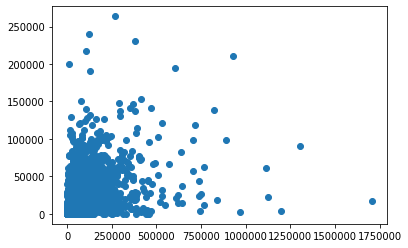

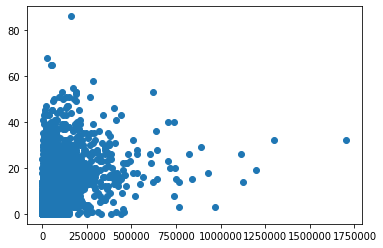

In [5]:
import seaborn as sns
#EDA
data.shape
data.dtypes
data.isna()
data.describe()
data.corr()
plt.scatter(x=data['Balance'],y=data['Bonus_miles'])
plt.show()
plt.scatter(x=data['Balance'],y=data['Bonus_trans'])
plt.show()

In [6]:
#normalizing the data
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
data=norm(data)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [9]:
from scipy.cluster.hierarchy import linkage
z=linkage(data,method="average",metric="euclidean")

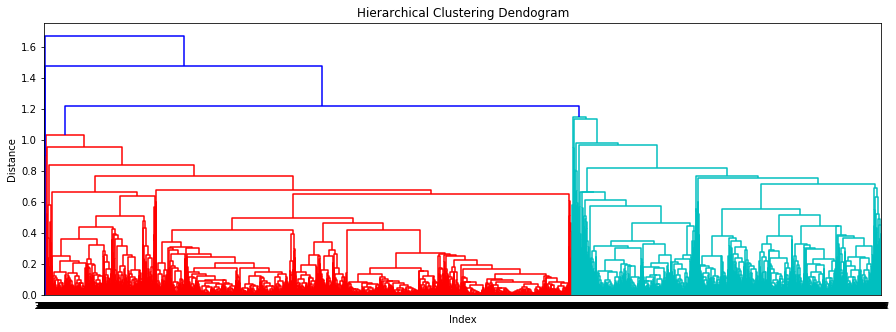

In [10]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5));plt.title("Hierarchical Clustering Dendogram");plt.xlabel("Index"),plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=4,linkage="average",affinity="euclidean").fit(data)

In [13]:
cluster_labels=pd.Series(h_complete.labels_)
data['clust']=cluster_labels
data=data.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
data.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,1,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,1,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [14]:
data.groupby(data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.056234,0.021535,0.41582,0.007791,0.004573,0.109274,0.181706,0.026059,0.046403,0.557974,1.0
1,0.035081,0.007858,0.17633,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,1.000000,0.000000,0.00000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0
3,0.077426,0.031127,0.37500,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0


In [16]:
#pwd
import os 
os.getcwd()
data.to_excel("airlines_clust_python.xlsx",encoding="utf-8")